In [2]:
import sys, os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(os.path.join('..', 'data_files', 'interest_rates_orig.csv'))

In [4]:
missing = df.apply(lambda col: pd.isna(col).sum()) / len(df)

In [5]:
missing = missing.sort_values()

/var/folders/5w/9htyqd7s7fvcqcn47w7nfyqc0000gn/T/ipykernel_35358/3080511380.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


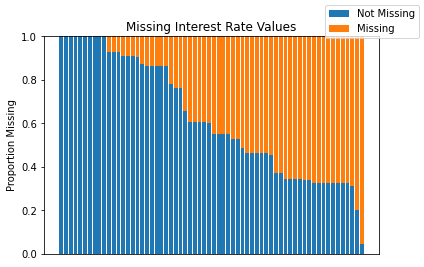

In [6]:
fig, ax = plt.subplots()
ax.set_title('Missing Interest Rate Values')
ax.set_ylabel('Proportion Missing')
ax.bar(missing.index.values, 1 - missing.values, label='Not Missing')
ax.bar(missing.index.values, missing.values, bottom=(1 - missing).values, label='Missing')
ax.set_xticks([])
fig.legend()

In [7]:
missing[missing < 0.1]

TCMNOM_Y7     0.000000
TCMNOM_Y5     0.000000
PRIME_NA      0.000000
TB_M6         0.000000
TCMNOM_Y10    0.000000
TCMNOM_Y1     0.000000
TB_M3         0.000000
FF_O          0.000000
date          0.000000
TCMNOM_Y3     0.000000
BAA_NA        0.069652
SL_Y20        0.069652
AAA_NA        0.069652
ED_M1         0.089552
ED_M3         0.089552
ED_M6         0.089552
MORTG_NA      0.094527
dtype: float64

In [8]:
use_cols = [
    'date', 
    'FF_O', 
    'SL_Y20', 
    'MORTG_NA', 
    'PRIME_NA', 
    'AAA_NA', 
    'BAA_NA', 
    'TCMNOM_Y1', 
    'TCMNOM_Y3', 
    'TCMNOM_Y5', 
    'TCMNOM_Y7', 
    'TCMNOM_Y10',
    'ED_M1', 
    'ED_M3',
    'ED_M6',
    'TB_M3',
    'TB_M6']

In [9]:
interest_rate_df = df[use_cols].copy()
interest_rate_df

,date,FF_O,SL_Y20,MORTG_NA,PRIME_NA,AAA_NA,BAA_NA,TCMNOM_Y1,TCMNOM_Y3,TCMNOM_Y5,TCMNOM_Y7,TCMNOM_Y10,ED_M1,ED_M3,ED_M6,TB_M3,TB_M6
0,01/31/1970,8.98,6.63,NaN,8.50,7.91,8.86,8.10,8.24,8.17,7.73,7.79,NaN,NaN,NaN,7.87,7.78
1,02/28/1970,8.98,6.22,NaN,8.50,7.93,8.78,7.59,7.79,7.82,7.51,7.24,NaN,NaN,NaN,7.13,7.22
2,03/31/1970,7.76,6.05,NaN,8.39,7.84,8.63,6.97,7.15,7.21,7.13,7.07,NaN,NaN,NaN,6.63,6.58
3,04/30/1970,8.10,6.65,NaN,8.00,7.83,8.70,7.06,7.39,7.50,7.45,7.39,NaN,NaN,NaN,6.51,6.60
4,05/31/1970,7.94,7.00,NaN,8.00,8.11,8.98,7.75,7.94,7.97,7.93,7.91,NaN,NaN,NaN,6.84,7.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,11/30/2019,1.55,NaN,NaN,4.75,NaN,NaN,1.57,1.61,1.64,1.74,1.81,NaN,NaN,NaN,1.54,1.55
599,12/31/2019,1.55,NaN,NaN,4.75,NaN,NaN,1.55,1.63,1.68,1.79,1.86,NaN,NaN,NaN,1.54,1.54
600,01/31/2020,1.55,NaN,NaN,4.75,NaN,NaN,1.53,1.52,1.56,1.67,1.76,NaN,NaN,NaN,1.52,1.52
601,02/29/2020,1.58,NaN,NaN,4.75,NaN,NaN,1.41,1.31,1.32,1.42,1.50,NaN,NaN,NaN,1.52,1.47


## Exampine Distributions of the Variables I'm Using
- This data is pretty tame. There is some skewness but standard normalization will be suitable

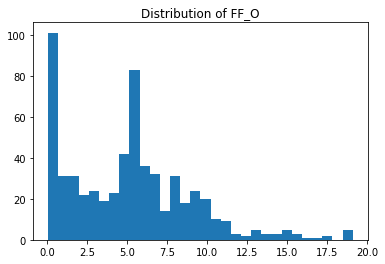

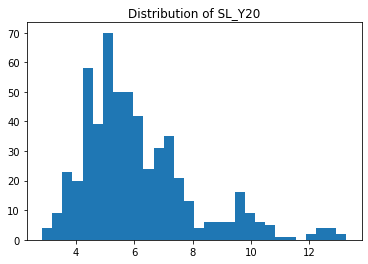

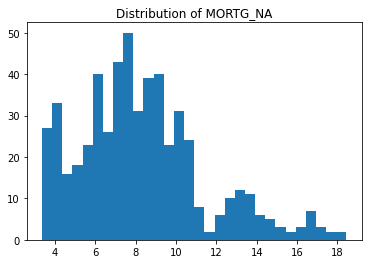

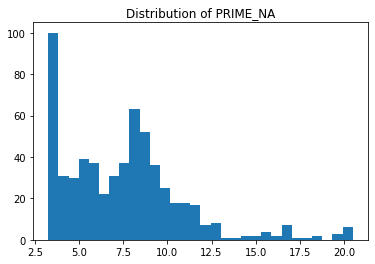

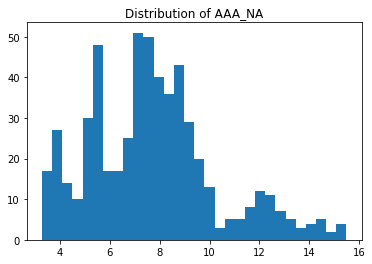

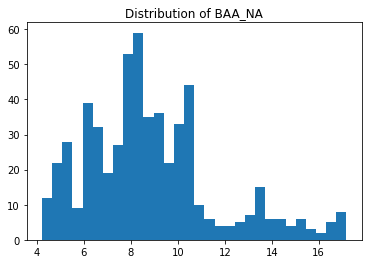

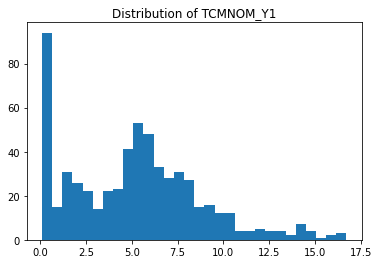

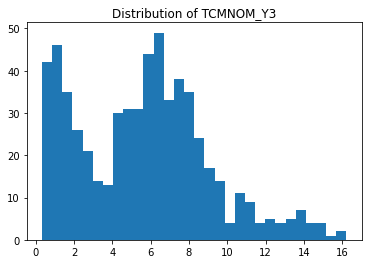

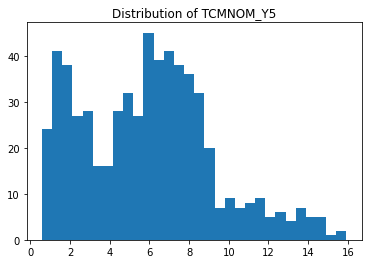

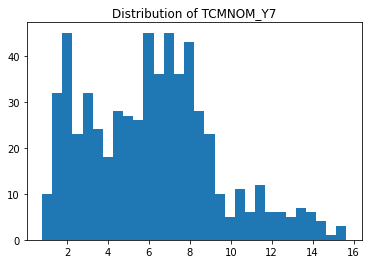

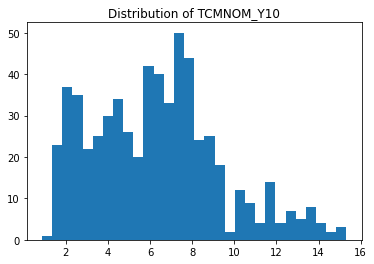

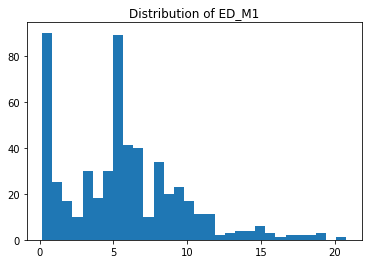

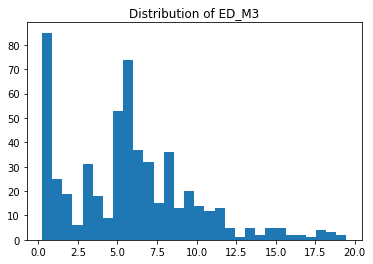

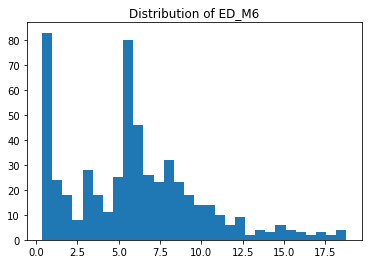

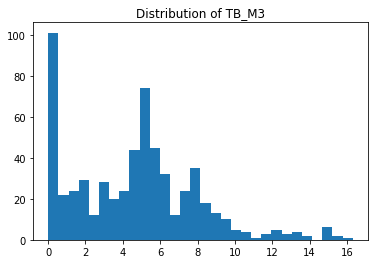

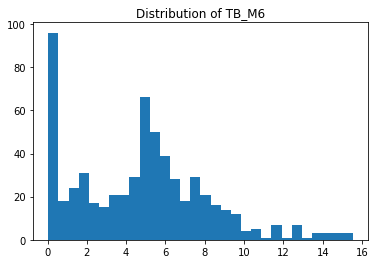

In [10]:
examine_dist = use_cols.copy()
examine_dist.remove('date')
for col in examine_dist:
    fig, ax = plt.subplots()
    ax.hist(interest_rate_df[col], bins=30)
    ax.set_title('Distribution of ' + col)

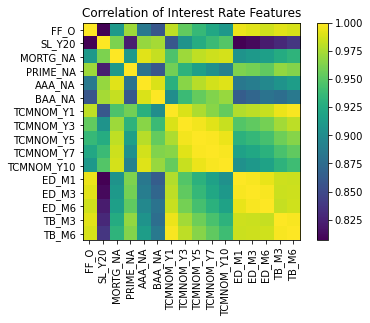

In [11]:
corr_df = df[examine_dist].corr()
fig, ax = plt.subplots()
cbar = ax.imshow(corr_df)
ax.set_xticks(np.arange(len(corr_df)))
ax.set_xticklabels(corr_df.index.values, rotation=90)
ax.set_yticks(np.arange(len(corr_df)))
ax.set_yticklabels(corr_df.index.values)
ax.set_title('Correlation of Interest Rate Features')
fig.colorbar(cbar)

## Write the interest rate data that we will use to a new dataframe

In [12]:
df['date']

0      01/31/1970
1      02/28/1970
2      03/31/1970
3      04/30/1970
4      05/31/1970
          ...    
598    11/30/2019
599    12/31/2019
600    01/31/2020
601    02/29/2020
602    03/31/2020
Name: date, Length: 603, dtype: object

In [13]:
interest_rate_df.to_csv(os.path.join('..', 'data_files', 'interest_rate_filtered.csv'), index=False)

In [14]:
interest_rate_df.groupby(pd.to_datetime(interest_rate_df['date']).dt.year).count()

,date,FF_O,SL_Y20,MORTG_NA,PRIME_NA,AAA_NA,BAA_NA,TCMNOM_Y1,TCMNOM_Y3,TCMNOM_Y5,TCMNOM_Y7,TCMNOM_Y10,ED_M1,ED_M3,ED_M6,TB_M3,TB_M6
date,,,,,,,,,,,,,,,,,
1970,12,12,12,0,12,12,12,12,12,12,12,12,0,0,0,12,12
1971,12,12,12,9,12,12,12,12,12,12,12,12,12,12,12,12,12
1972,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1973,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1974,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1975,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1976,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1977,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1978,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
